In [1]:
import pandas as pd
from Stocks import Stock
from Portfolio import Portfolio
import plotter as plot
import matplotlib.pyplot as plt
import yaml
import sys
from pathlib import Path
import distributions as dt
import returns as rt
import numpy as np

import scipy.stats as stats
from prophet import Prophet
import matplotlib.pyplot as plt
import prophet_helpers as ph



def read_yaml(file_name): 
    with open(file_name) as file:
        yaml_data= yaml.safe_load(file)
    return yaml_data

config = read_yaml('config.yaml')
# config['canadian_etfs_parsed']
canadian_etfs_parsed = config['canadian_etfs_parsed']
canadian_etfs_parsed



['VFV.TO']

<img src="Dataset_info.png" alt="Screenshot" width="800" height='400'/>

In [2]:
def subtract_dates(date1, date2):
    date1_obj = datetime.strptime(date1, '%Y-%m-%d')
    date2_obj = datetime.strptime(date2, '%Y-%m-%d')
    diff = date1_obj - date2_obj
    return diff.days

from datetime import datetime, timedelta

def subtract_days(date_str, days):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    new_date_obj = date_obj - timedelta(days=days)
    return new_date_obj.strftime('%Y-%m-%d')


import pandas as pd


def subtract_trading_days(date_str, days):
    date_obj = pd.to_datetime(date_str)
    offset = pd.offsets.BDay(n=days * -1)
    new_date_obj = offset.apply(date_obj)
    return new_date_obj.strftime('%Y-%m-%d')




In [3]:
subtract_trading_days('2012-12-31', 502)

/var/folders/tp/tgqd8prn2x1g474v7zwrxq7r0000gn/T/ipykernel_31011/2576946134.py:1: FutureWarning: BusinessDay.apply is deprecated and will be removed in a future version. Use `offset + other` instead
  subtract_trading_days('2012-12-31', 502)


'2011-01-27'

In [4]:
start_dt = '2011-01-03'
end_dt= '2015-04-13'
training_start_dt = '2011-01-03'
training_end_dt = '2012-12-31'

test_start_dt = '2013-01-02' 
test_end_dt = '2013-12-31'

out_of_sample_start_dt = '2014-01-02'
out_of_sample_end_dt = '2015-04-13'

dia_df = Stock('DIA', start_dt, end_dt)
# dia_df.ticker_data['ticker'] = 'diaA'

spy_df= Stock('SPY',start_dt, end_dt)
# spy_df.ticker_data['ticker'] = 'SPY'

qqq_df = Stock('QQQ', start_dt, end_dt)
# qqq_df.ticker_data['ticker'] = 'QQQ'

data from alpaca
Data from alpaca not available, pulling from yahoo
[*********************100%***********************]  1 of 1 completed
data from alpaca
Data from alpaca not available, pulling from yahoo
[*********************100%***********************]  1 of 1 completed
data from alpaca
Data from alpaca not available, pulling from yahoo
[*********************100%***********************]  1 of 1 completed


In [5]:
dia_df.ticker_data

Open        High         Low       Close   Volume ticker  \
2011-01-03  116.410004  116.860001  116.360001  116.410004  9108900    DIA   
2011-01-04  116.709999  116.730003  116.110001  116.639999  9775600    DIA   
2011-01-05  116.459999  117.190002  116.300003  117.040001  7567800    DIA   
2011-01-06  117.139999  117.190002  116.500000  116.779999  7161600    DIA   
2011-01-07  116.910004  117.099998  115.820000  116.570000  9249800    DIA   
...                ...         ...         ...         ...      ...    ...   
2015-04-06  176.320007  179.169998  176.089996  178.589996  6284900    DIA   
2015-04-07  178.770004  179.580002  178.419998  178.419998  6011600    DIA   
2015-04-08  178.600006  179.559998  177.960007  178.750000  4738500    DIA   
2015-04-09  178.660004  179.630005  177.979996  179.399994  4483800    DIA   
2015-04-10  179.669998  180.440002  179.179993  180.369995  3463600    DIA   

            pct_change  Cumulative_Percentage_Change  normalized_close  \
2011-01-03         NaN                      0.000000          0.131682   
2011-01-04    0.001976                      0.197574          0.134696   
2011-01-05    0.003429                      0.541188          0.139937   
2011-01-06   -0.002221                      0.317838          0.136530   
2011-01-07   -0.001798                      0.137442          0.133779   
...                ...                           ...               ...   
2015-04-06    0.007105                     53.414647          0.946410   
2015-04-07   -0.000952                     53.268613          0.944182   
2015-04-08    0.001850                     53.552096          0.948506   
2015-04-09    0.003636                     54.110462          0.957023   
2015-04-10    0.005407                     54.943724          0.969733   

            cumulative_mean_normalized_close  \
2011-01-03                          0.131682   
2011-01-04                          0.133189   
2011-01-05                          0.135439   
2011-01-06                          0.135711   
2011-01-07                          0.135325   
...                                      ...   
2015-04-06                          0.490137   
2015-04-07                          0.490561   
2015-04-08                          0.490988   
2015-04-09                          0.491422   
2015-04-10                          0.491868   

            cumulative_variance_normalized_close  \
2011-01-03                              0.000000   
2011-01-04                              0.000002   
2011-01-05                              0.000012   
2011-01-06                              0.000009   
2011-01-07                              0.000008   
...                                          ...   
2015-04-06                              0.073307   
2015-04-07                              0.073431   
2015-04-08                              0.073558   
2015-04-09                              0.073692   
2015-04-10                              0.073836   

            cumulative_std_normalized_close      skew  kurtosis  \
2011-01-03                         0.000000 -0.426358  4.152463   
2011-01-04                         0.001507 -0.426358  4.152463   
2011-01-05                         0.003411 -0.426358  4.152463   
2011-01-06                         0.002991 -0.426358  4.152463   
2011-01-07                         0.002785 -0.426358  4.152463   
...                                     ...       ...       ...   
2015-04-06                         0.270753 -0.426358  4.152463   
2015-04-07                         0.270982 -0.426358  4.152463   
2015-04-08                         0.271216 -0.426358  4.152463   
2015-04-09                         0.271462 -0.426358  4.152463   
2015-04-10                         0.271728 -0.426358  4.152463   

            Jarque_Bera_stat  Jarque_Bera_p_val  
2011-01-03        804.160704      2.391784e-175  
2011-01-04        804.160704      2.391784e-175  
2011-01-05        804.160704      2

In [6]:
p = Portfolio(tickers=[ 'DIA', 'QQQ', 'SPY' ], start_dt=start_dt, end_dt=end_dt)
p

data from alpaca
Data from alpaca not available, pulling from yahoo
[*********************100%***********************]  1 of 1 completed
data from alpaca
Data from alpaca not available, pulling from yahoo


/Users/aordorica/Documents/UofT/MIE 1613/Final Project/Portfolio.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary_statistics = self.summary_statistics.append({
/Users/aordorica/Documents/UofT/MIE 1613/Final Project/Portfolio.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.all_stocks_df = self.all_stocks_df.append(stock.ticker_data)


[*********************100%***********************]  1 of 1 completed
data from alpaca
Data from alpaca not available, pulling from yahoo


/Users/aordorica/Documents/UofT/MIE 1613/Final Project/Portfolio.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary_statistics = self.summary_statistics.append({
/Users/aordorica/Documents/UofT/MIE 1613/Final Project/Portfolio.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.all_stocks_df = self.all_stocks_df.append(stock.ticker_data)


[*********************100%***********************]  1 of 1 completed


/Users/aordorica/Documents/UofT/MIE 1613/Final Project/Portfolio.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.summary_statistics = self.summary_statistics.append({
/Users/aordorica/Documents/UofT/MIE 1613/Final Project/Portfolio.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.all_stocks_df = self.all_stocks_df.append(stock.ticker_data)


In [7]:

import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
    
p.summary_statistics.style.background_gradient(cmap=cm)

In [8]:
p.correlation_matrix

DIA       QQQ       SPY
DIA  1.000000  0.871865  0.971892
QQQ  0.871865  1.000000  0.926446
SPY  0.971892  0.926446  1.000000

In [9]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
    
p.correlation_matrix.style.background_gradient(cmap=cm)

In [10]:
# df = pd.concat([dia_df.ticker_data, spy_df.ticker_data, qqq_df.ticker_data])
# df.head()


df = p.all_stocks_df.copy(deep=True)
df.head()

Open        High         Low       Close   Volume ticker  \
2011-01-03  116.410004  116.860001  116.360001  116.410004  9108900    DIA   
2011-01-04  116.709999  116.730003  116.110001  116.639999  9775600    DIA   
2011-01-05  116.459999  117.190002  116.300003  117.040001  7567800    DIA   
2011-01-06  117.139999  117.190002  116.500000  116.779999  7161600    DIA   
2011-01-07  116.910004  117.099998  115.820000  116.570000  9249800    DIA   

            pct_change  Cumulative_Percentage_Change  normalized_close  \
2011-01-03         NaN                      0.000000          0.131682   
2011-01-04    0.001976                      0.197574          0.134696   
2011-01-05    0.003429                      0.541188          0.139937   
2011-01-06   -0.002221                      0.317838          0.136530   
2011-01-07   -0.001798                      0.137442          0.133779   

            cumulative_mean_normalized_close  \
2011-01-03                          0.131682   
2011-01-04                          0.133189   
2011-01-05                          0.135439   
2011-01-06                          0.135711   
2011-01-07                          0.135325   

            cumulative_variance_normalized_close  \
2011-01-03                              0.000000   
2011-01-04                              0.000002   
2011-01-05                              0.000012   
2011-01-06                              0.000009   
2011-01-07                              0.000008   

            cumulative_std_normalized_close      skew  kurtosis  \
2011-01-03                         0.000000 -0.426358  4.152463   
2011-01-04                         0.001507 -0.426358  4.152463   
2011-01-05                         0.003411 -0.426358  4.152463   
2011-01-06                         0.002991 -0.426358  4.152463   
2011-01-07                         0.002785 -0.426358  4.152463   

            Jarque_Bera_stat  Jarque_Bera_p_val  
2011-01-03        804.160704      2.391784e-175  
2011-01-04        804.160704      2.391784e-175  
2011-01-05        804.160704      2.391784e-175  
2011-01-06        804.160704      2.391784e-175  
2011-01-07        804.160704      2.391784e-175

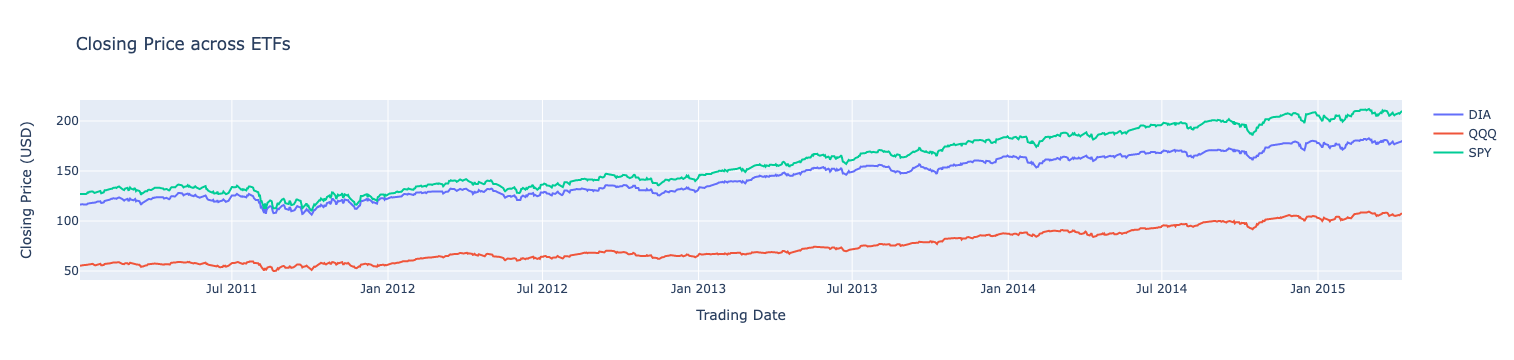

In [11]:
plot.plot_column_across_tickers(df, col_name = 'Close', title='Closing Price across ETFs', yaxis_title='Closing Price (USD)', xaxis_title='Trading Date')




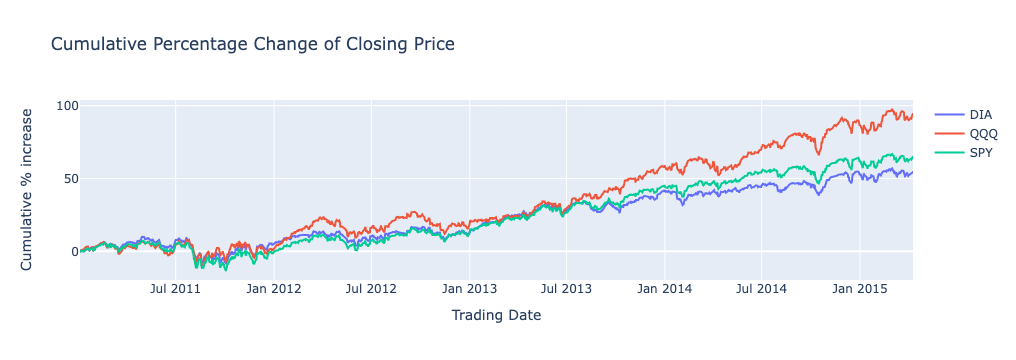

In [12]:
plot.plot_column_across_tickers(df, col_name = 'Cumulative_Percentage_Change', title='Cumulative Percentage Change of Closing Price', xaxis_title='Trading Date', yaxis_title='Cumulative % increase')

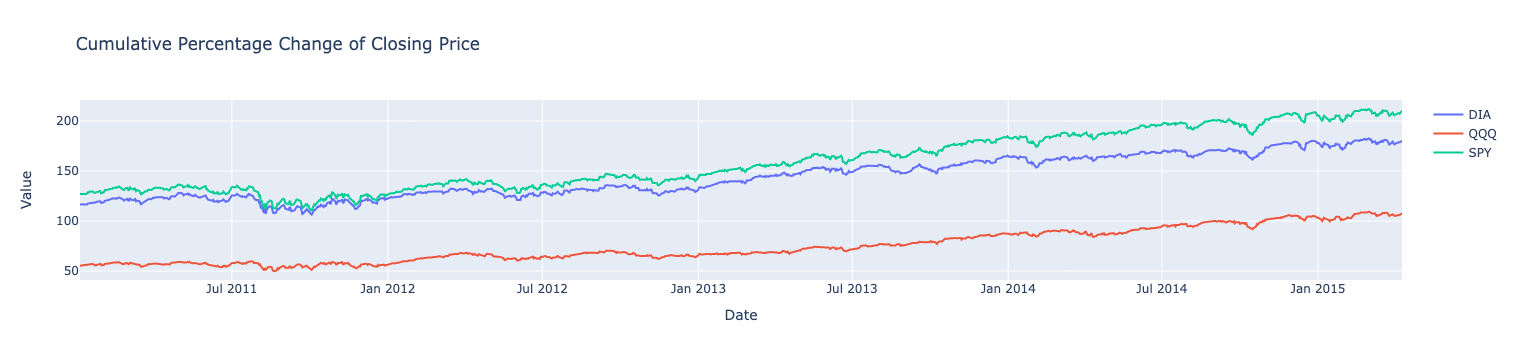

In [13]:
plot.plot_column_across_tickers(df, col_name = 'Close', title='Cumulative Percentage Change of Closing Price')

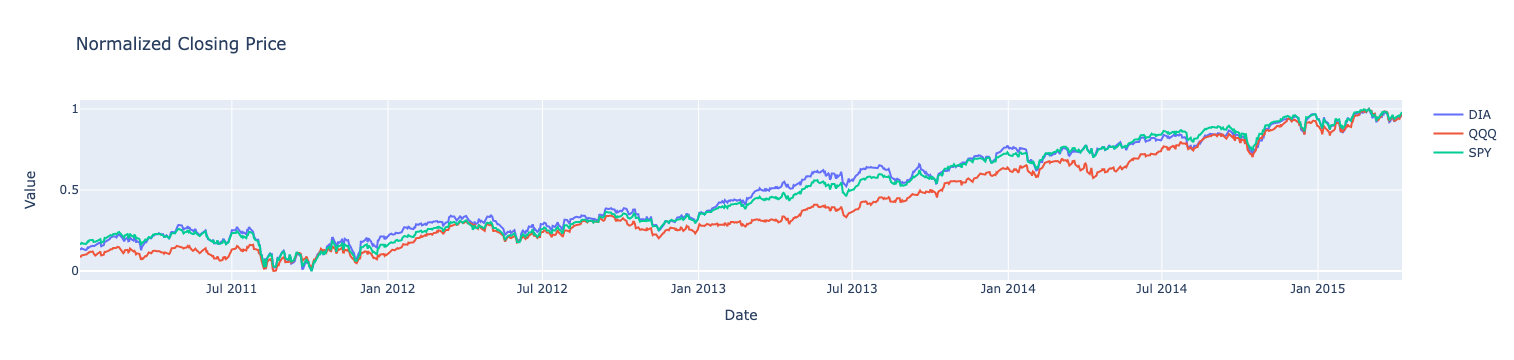

In [14]:
plot.plot_column_across_tickers(df, col_name = 'normalized_close', title='Normalized Closing Price')

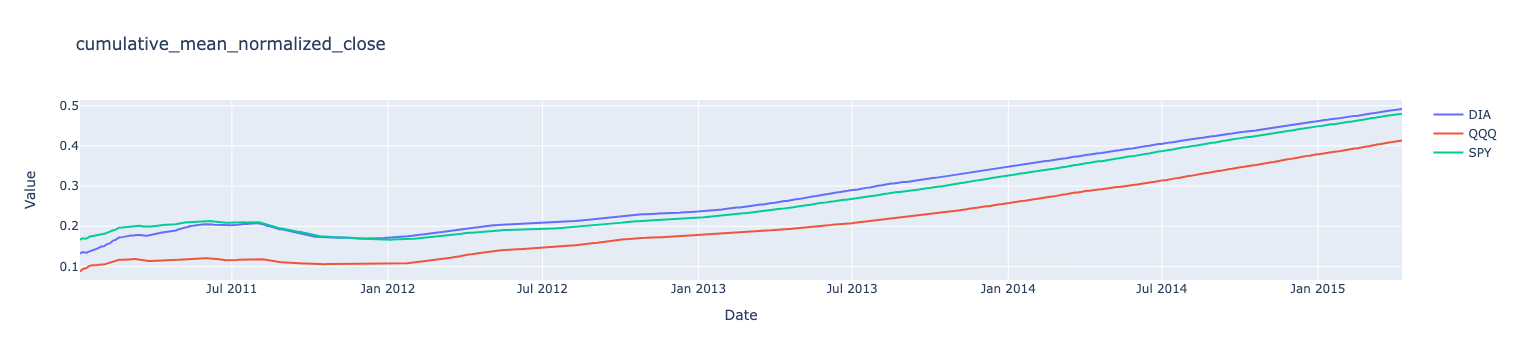

In [15]:
plot.plot_column_across_tickers(df, col_name = 'cumulative_mean_normalized_close', title='cumulative_mean_normalized_close')

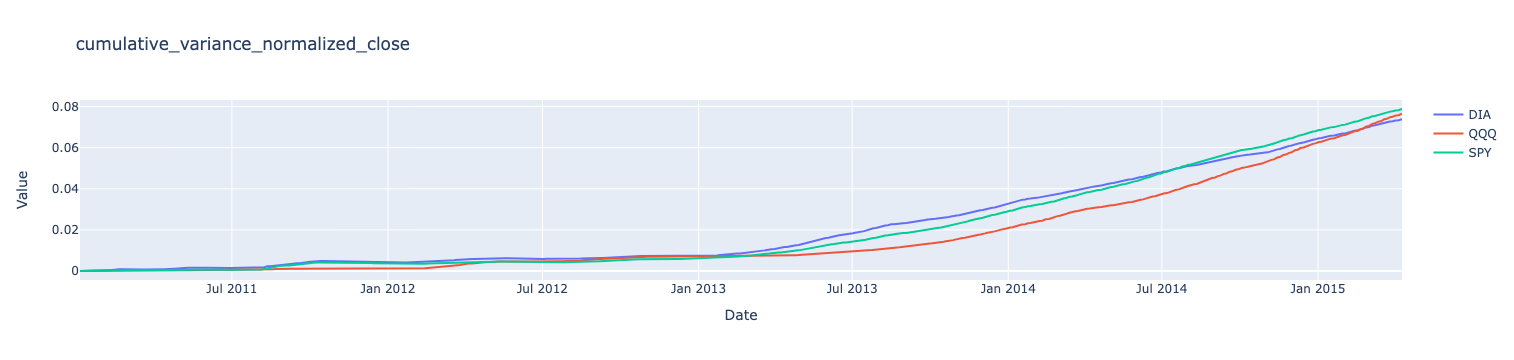

In [16]:
plot.plot_column_across_tickers(df, col_name = 'cumulative_variance_normalized_close', title='cumulative_variance_normalized_close')

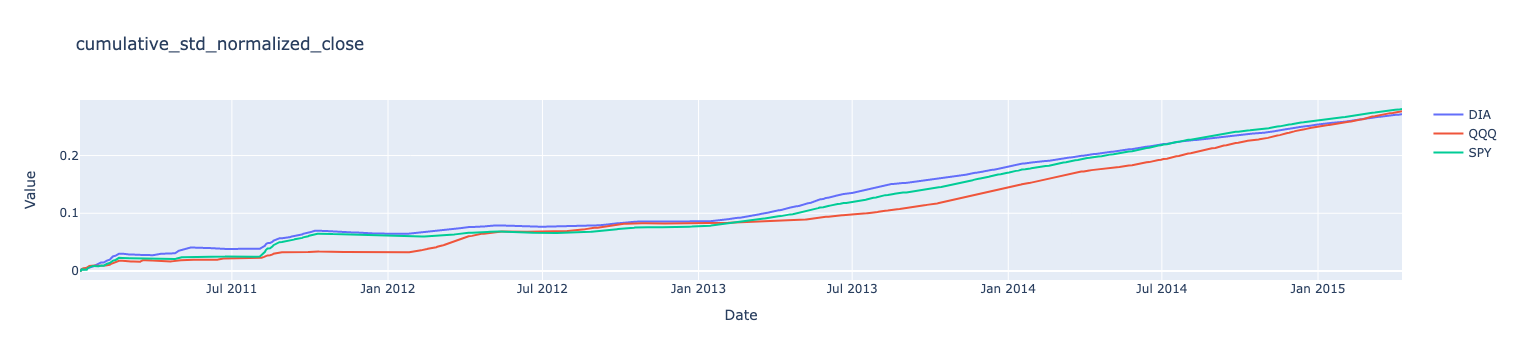

In [17]:
plot.plot_column_across_tickers(df, col_name = 'cumulative_std_normalized_close', title='cumulative_std_normalized_close')

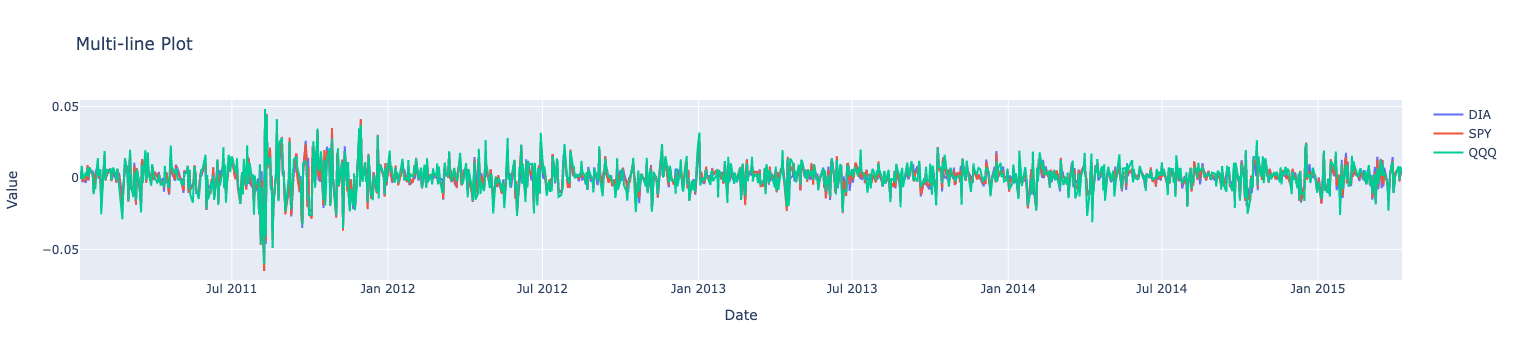

In [18]:
x_data = [list(dia_df.ticker_data.index),list(spy_df.ticker_data.index),list(qqq_df.ticker_data.index)]
y_data = [list(dia_df.ticker_data['pct_change']), list(spy_df.ticker_data['pct_change']), list(qqq_df.ticker_data['pct_change'])]

plot.plot_multi_line_chart(x_data, y_data, labels=['DIA', 'SPY', 'QQQ'])

In [19]:



import numpy as np

def cumulative_sharpe_ratio(returns, risk_free_rate=0.02):
    cum_returns = (1 + np.asarray(returns)).cumprod() - 1
    cum_excess_returns = cum_returns - risk_free_rate
    return cum_excess_returns.mean() / cum_excess_returns.std()



In [20]:
import financial_ratios as fr

In [21]:
qqq_df.ticker_data.iloc[-100:].index.max()

'2015-04-10'

In [22]:
import numpy as np

num_periods_per_year = 252  # Assuming 252 trading days in a year
returns = list(qqq_df.ticker_data['pct_change'].iloc[-100:])
risk_free_rate = 0.02

num_periods_per_year = 252  # Assuming 252 trading days in a year
num_periods = len(returns)

# Convert the annual risk-free rate to a period risk-free rate
risk_free_rate_period = np.power(1 + risk_free_rate, 1 / num_periods_per_year) - 1

# Calculate the Sharpe Ratio using the adjusted risk-free rate
sharpe_ratio_value = fr.sharpe_ratio(returns, risk_free_rate_period)
print(sharpe_ratio_value)


0.047394142681231904


In [23]:
np.mean(qqq_df.ticker_data['pct_change']), np.std(qqq_df.ticker_data['pct_change'])

(0.000677142553587241, 0.010521866600949972)

In [24]:
sharpe_ratio(qqq_df.ticker_data['pct_change'].iloc[1:]), sortino_ratio(qqq_df.ticker_data['pct_change'].iloc[1:])

(0.056887017703546164, 0.08072597460895371)

In [25]:
sharpe_ratio(spy_df.ticker_data['pct_change'].iloc[1:]), sortino_ratio(spy_df.ticker_data['pct_change'].iloc[1:])

(0.04547652952443399, 0.06359593143196816)

In [27]:

# sharpe_ratios = []
# for n in range(2,len(qqq_df.ticker_data['pct_change'])): 
#     sharpe_ratios.append(fr.sharpe_ratio(list(qqq_df.ticker_data['pct_change'].iloc[1:n+1])))
# # sharpe_ratios    


# plt.plot(pd.to_datetime(np.array(qqq_df.ticker_data.index)), qqq_df.ticker_data['Cumulative_Percentage_Change'], label='Close')
# plt.plot(pd.to_datetime(np.array(qqq_df.ticker_data.index),sharpe_ratios))
# # plt.xticks(rotation=90)

In [28]:

cumulative_sharpe_ratio(list(qqq_df.ticker_data['pct_change'].iloc[1:]), risk_free_rate=0.02)

1.107644878384074

In [29]:


fr.sharpe_ratio(qqq_df.ticker_data['pct_change'].iloc[1:100], risk_free_rate=0.02)

-2.1769571910288628

In [30]:




agg_stats_df = []
tickers = list(df['ticker'].unique())

for i in range(0,len(tickers)):
    temp_df = df[df['ticker']==tickers[i]]
    
    

    price_data = temp_df['Close']
    returns = (price_data / price_data.shift(1)) - 1
    returns = returns.iloc[1:]
    
    VaR = rt.historical_var(returns, confidence_level=0.95)
    cVaR = rt.historical_cvar(returns, confidence_level=0.95)
    sharpe_ratio = fr.sharpe_ratio(returns, risk_free_rate=0.02)
    sortino_ratio = fr.sortino_ratio(returns, risk_free_rate=0.02)
    
    
    print(f"Historical VaR :{VaR}")
    print(f"Historical cVaR :{cVaR}")

    agg_stats_df.append(pd.DataFrame({'ticker':[tickers[i]], 'mean':[temp_df['normalized_close'].mean()], 'std_dev':[temp_df['normalized_close'].std()], \
                                     'VaR':[VaR], 'cVaR':[cVaR], 'sharpe_ratio':[sharpe_ratio], 'sortino_ratio':[sortino_ratio]}))
    
agg_stats_df = pd.concat(agg_stats_df)
agg_stats_df



Historical VaR :0.014497983135277897
Historical cVaR :0.02126555571682207
Historical VaR :0.01683519001841196
Historical cVaR :0.0244655884183221
Historical VaR :0.015868511657855144
Historical cVaR :0.023026228323637512


ticker      mean   std_dev       VaR      cVaR  sharpe_ratio  sortino_ratio
0    DIA  0.491868  0.271854  0.014498  0.021266     -2.207118      -0.912339
0    QQQ  0.413759  0.276854  0.016835  0.024466     -1.836448      -0.881073
0    SPY  0.480239  0.280807  0.015869  0.023026     -2.031654      -0.899673

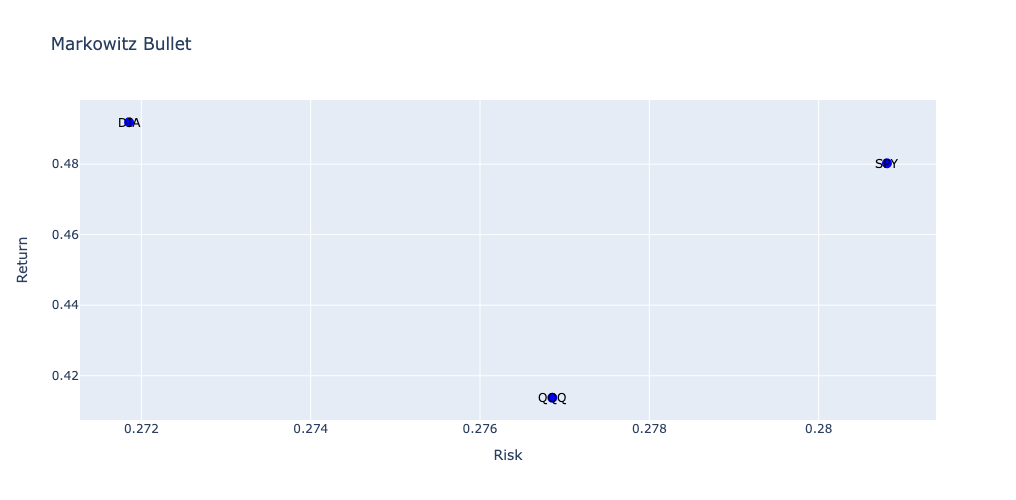

In [31]:
plot.plot_markowitz_bullet(list(agg_stats_df['std_dev']), list(agg_stats_df['mean']), text_vals =list(agg_stats_df['ticker']),  title='Markowitz Bullet', xaxis_title='Risk', yaxis_title='Return')

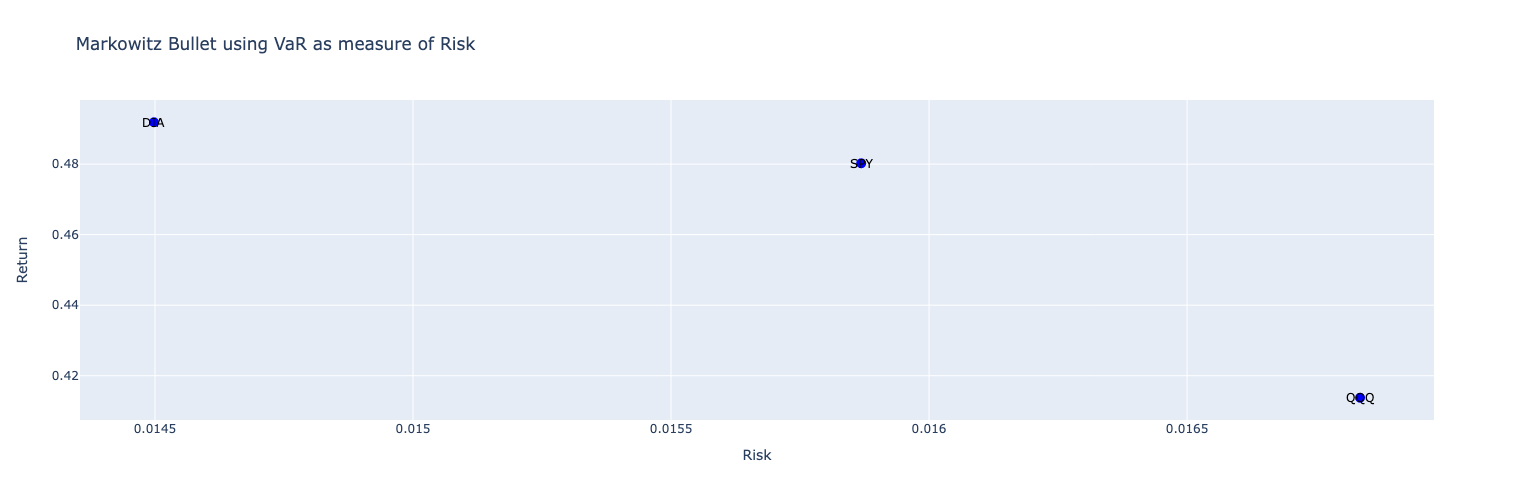

In [32]:
plot.plot_markowitz_bullet(list(agg_stats_df['VaR']), list(agg_stats_df['mean']), text_vals =list(agg_stats_df['ticker']),  title='Markowitz Bullet using VaR as measure of Risk', xaxis_title='Risk', yaxis_title='Return')


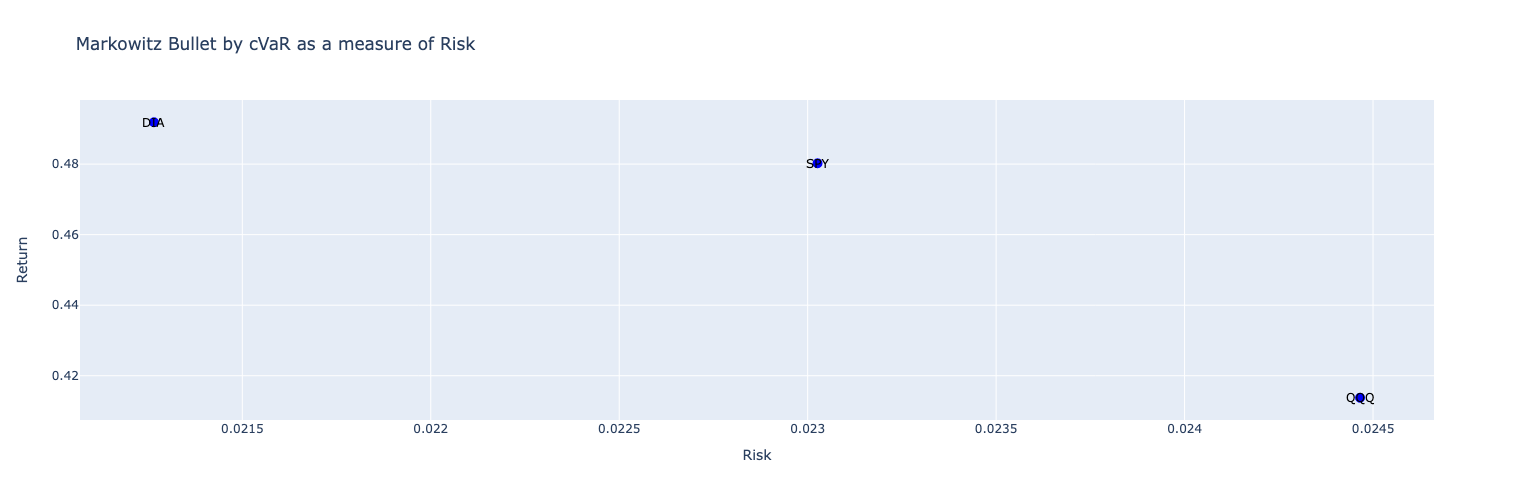

In [33]:
plot.plot_markowitz_bullet(list(agg_stats_df['cVaR']), list(agg_stats_df['mean']), text_vals =list(agg_stats_df['ticker']),  title='Markowitz Bullet by cVaR as a measure of Risk', xaxis_title='Risk', yaxis_title='Return')

/Users/aordorica/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



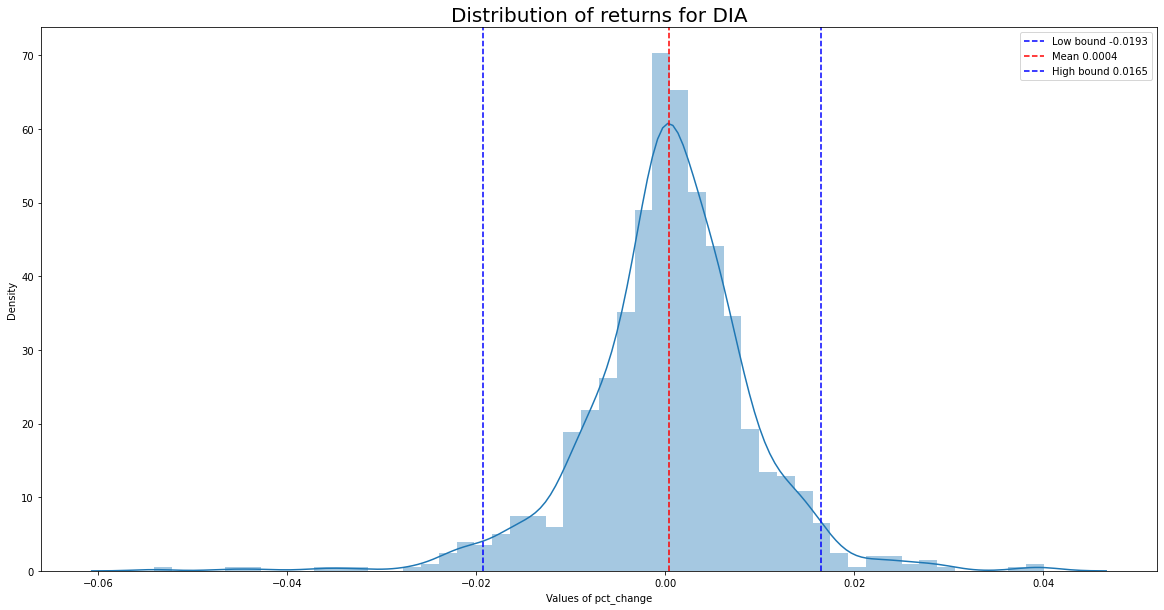

(-0.019337335654506904, 0.00044751473518549173, 0.016548047910153407)

In [34]:
low_bound, mean, high_bound = dt.get_confidence_interval(dia_df.ticker_data, 'pct_change',title= 'Distribution of returns for DIA', conf_interval=95)
low_bound, mean, high_bound 

/Users/aordorica/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



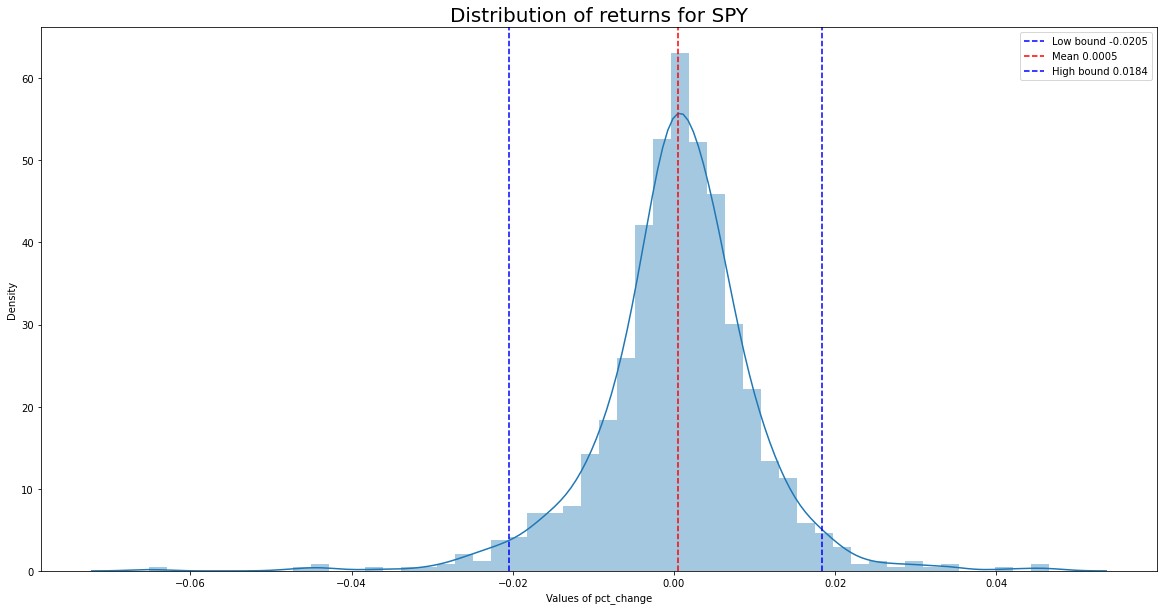

(-0.02047547956234408, 0.0005147428740978564, 0.01843280120869073)

In [35]:
low_bound, mean, high_bound = dt.get_confidence_interval(spy_df.ticker_data, 'pct_change', title='Distribution of returns for SPY',conf_interval=95)
low_bound, mean, high_bound 

/Users/aordorica/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



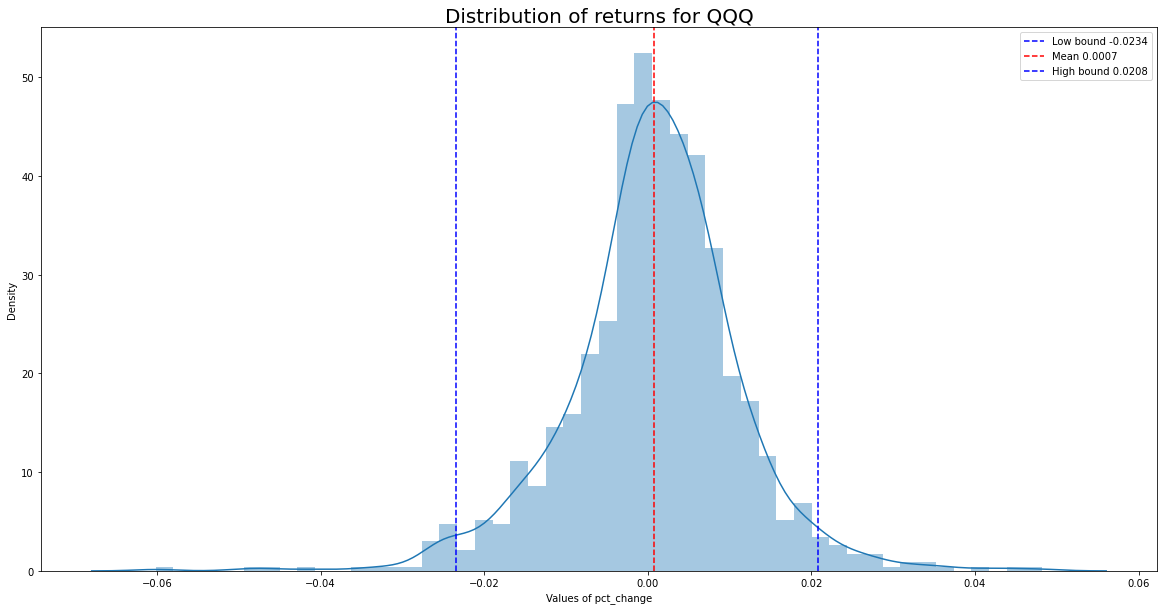

(-0.023438803232610717, 0.000677142553587241, 0.02076793119111553)

In [36]:
low_bound, mean, high_bound = dt.get_confidence_interval(qqq_df.ticker_data, 'pct_change', title='Distribution of returns for QQQ', conf_interval=95)
low_bound, mean, high_bound 

In [37]:
dia_df = Stock('DIA', start_dt, end_dt)
# dia_df.ticker_data['ticker'] = 'diaA'

spy_df= Stock('SPY', start_dt, end_dt)
# spy_df.ticker_data['ticker'] = 'SPY'

qqq_df = Stock('QQQ', start_dt, end_dt)
# qqq_df.ticker_data['ticker'] = 'QQQ'

data from alpaca
Data from alpaca not available, pulling from yahoo
[*********************100%***********************]  1 of 1 completed
data from alpaca
Data from alpaca not available, pulling from yahoo
[*********************100%***********************]  1 of 1 completed
data from alpaca
Data from alpaca not available, pulling from yahoo
[*********************100%***********************]  1 of 1 completed


In [38]:
dfs = [dia_df.ticker_data,spy_df.ticker_data, qqq_df.ticker_data]


def merge_dfs(dfs): 

    merged_df = dfs[0].copy(deep=True)
    ticker = merged_df['ticker'].iloc[0]
    merged_df.rename(columns={'Close':f'Close_{ticker}'}, inplace=True)

    for i in range(1,len(dfs)): 
        temp_df =dfs[i].copy(deep=True)
        temp_ticker = temp_df['ticker'].iloc[0]
        temp_df.rename(columns={'Close':f'Close_{temp_ticker}'}, inplace=True)


        merged_df = pd.merge(merged_df, temp_df, left_index=True, right_index=True)
        
    return merged_df 
    
merged_df =merge_dfs(dfs)
merged_df.head()

Open_x      High_x       Low_x   Close_DIA  Volume_x ticker_x  \
2011-01-03  116.410004  116.860001  116.360001  116.410004   9108900      DIA   
2011-01-04  116.709999  116.730003  116.110001  116.639999   9775600      DIA   
2011-01-05  116.459999  117.190002  116.300003  117.040001   7567800      DIA   
2011-01-06  117.139999  117.190002  116.500000  116.779999   7161600      DIA   
2011-01-07  116.910004  117.099998  115.820000  116.570000   9249800      DIA   

            pct_change_x  Cumulative_Percentage_Change_x  normalized_close_x  \
2011-01-03           NaN                        0.000000            0.131682   
2011-01-04      0.001976                        0.197574            0.134696   
2011-01-05      0.003429                        0.541188            0.139937   
2011-01-06     -0.002221                        0.317838            0.136530   
2011-01-07     -0.001798                        0.137442            0.133779   

            cumulative_mean_normalized_close_x  ...  pct_change  \
2011-01-03                            0.131682  ...         NaN   
2011-01-04                            0.133189  ...   -0.000723   
2011-01-05                            0.135439  ...    0.008504   
2011-01-06                            0.135711  ...    0.003229   
2011-01-07                            0.135325  ...   -0.000894   

            Cumulative_Percentage_Change  normalized_close  \
2011-01-03                      0.000000          0.088964   
2011-01-04                     -0.072321          0.088290   
2011-01-05                      0.777437          0.096209   
2011-01-06                      1.102869          0.099242   
2011-01-07                      1.012471          0.098399   

            cumulative_mean_normalized_close  \
2011-01-03                          0.088964   
2011-01-04                          0.088627   
2011-01-05                          0.091154   
2011-01-06                          0.093176   
2011-01-07                          0.094221   

            cumulative_variance_normalized_close  \
2011-01-03                          0.000000e+00   
2011-01-04                          1.135634e-07   
2011-01-05                          1.285105e-05   
2011-01-06                          2.190242e-05   
2011-01-07                          2.188707e-05   

            cumulative_std_normalized_close      skew  kurtosis  \
2011-01-03                         0.000000 -0.319222  3.023044   
2011-01-04                         0.000337 -0.319222  3.023044   
2011-01-05                         0.003585 -0.319222  3.023044   
2011-01-06                         0.004680 -0.319222  3.023044   
2011-01-07                         0.004678 -0.319222  3.023044   

            Jarque_Bera_stat  Jarque_Bera_p_val  
2011-01-03        427.201569       1.715371e-93  
2011-01-04        427.201569       1.715371e-93  
2011-01-05        427.201569       1.715371e-93  
2011-01-06        427.201569       1.715371e-93  
2011-01-07        427.201569       1.715371e-93  

[5 rows x 48 columns]

In [39]:
# dia_df.ticker_data.head()

In [40]:
irrelevant_cols = [col for col in merged_df.columns if any(x in col.lower() for x in ['open', 'high', 'low', 'volume'])]
irrelevant_cols

merged_df.drop(columns=irrelevant_cols, inplace=True)
close_cols = [f'Close_{ticker}' for ticker in tickers]
close_cols

['Close_DIA', 'Close_QQQ', 'Close_SPY']

In [41]:
merged_df = merged_df[close_cols]
merged_df.head()

Close_DIA  Close_QQQ   Close_SPY
2011-01-03  116.410004  55.310001  127.050003
2011-01-04  116.639999  55.270000  126.980003
2011-01-05  117.040001  55.740002  127.639999
2011-01-06  116.779999  55.919998  127.389999
2011-01-07  116.570000  55.869999  127.139999

In [42]:
def generate_combinations(step=0.2, target_sum=1.0, num_variables=3, precision=1):
    combinations = []
    num_steps = int(target_sum / step) + 1

    for i in range(num_steps):
        for j in range(num_steps - i):
            k = num_steps - i - j - 1
            if round(i * step, precision) + round(j * step, precision) + round(k * step, precision) == target_sum:
                combinations.append((round(i * step, precision), round(j * step, precision), round(k * step, precision)))

    return combinations

combinations = generate_combinations()
print(combinations)


[(0.0, 0.0, 1.0), (0.0, 0.2, 0.8), (0.0, 0.4, 0.6), (0.0, 0.6, 0.4), (0.0, 0.8, 0.2), (0.0, 1.0, 0.0), (0.2, 0.0, 0.8), (0.2, 0.2, 0.6), (0.2, 0.4, 0.4), (0.2, 0.6, 0.2), (0.2, 0.8, 0.0), (0.4, 0.0, 0.6), (0.4, 0.2, 0.4), (0.4, 0.4, 0.2), (0.4, 0.6, 0.0), (0.6, 0.0, 0.4), (0.6, 0.2, 0.2), (0.6, 0.4, 0.0), (0.8, 0.0, 0.2), (0.8, 0.2, 0.0), (1.0, 0.0, 0.0)]


In [43]:
tickers

['DIA', 'QQQ', 'SPY']

In [44]:
i =7
combination = combinations[i]
combination

(0.2, 0.2, 0.6)

In [45]:
combinations_df = pd.DataFrame(combinations, columns=tickers)
combinations_df

DIA  QQQ  SPY
0   0.0  0.0  1.0
1   0.0  0.2  0.8
2   0.0  0.4  0.6
3   0.0  0.6  0.4
4   0.0  0.8  0.2
5   0.0  1.0  0.0
6   0.2  0.0  0.8
7   0.2  0.2  0.6
8   0.2  0.4  0.4
9   0.2  0.6  0.2
10  0.2  0.8  0.0
11  0.4  0.0  0.6
12  0.4  0.2  0.4
13  0.4  0.4  0.2
14  0.4  0.6  0.0
15  0.6  0.0  0.4
16  0.6  0.2  0.2
17  0.6  0.4  0.0
18  0.8  0.0  0.2
19  0.8  0.2  0.0
20  1.0  0.0  0.0

In [46]:
# # pd.DataFrame({''})
# break

### Simulation of Portfolio performance under naive weights

In [47]:
initial_budget =10000

def simulate_portfolio_value(input_df, combination): 

    for i in range(0,len(combination)): 
        input_df[f'weight_{tickers[i]}'] = combination[i]

    for ticker in tickers: 
        input_df[f'{ticker}_num_stocks'] = initial_budget*input_df[f'weight_{ticker}'].iloc[0]/input_df[f'Close_{ticker}'].iloc[0]

    portfolio_values = []
    for i in range(0,len(input_df)): 
        portfolio_value = 0
        for ticker in tickers: 
            portfolio_value+= input_df[f'Close_{ticker}'].iloc[i] * input_df[f'{ticker}_num_stocks'].iloc[0]
        portfolio_values.append(portfolio_value)
    portfolio_values

    input_df['portfolio_value'] = portfolio_values

    return input_df

Text(0, 0.5, 'Portfolio Value in USD $')

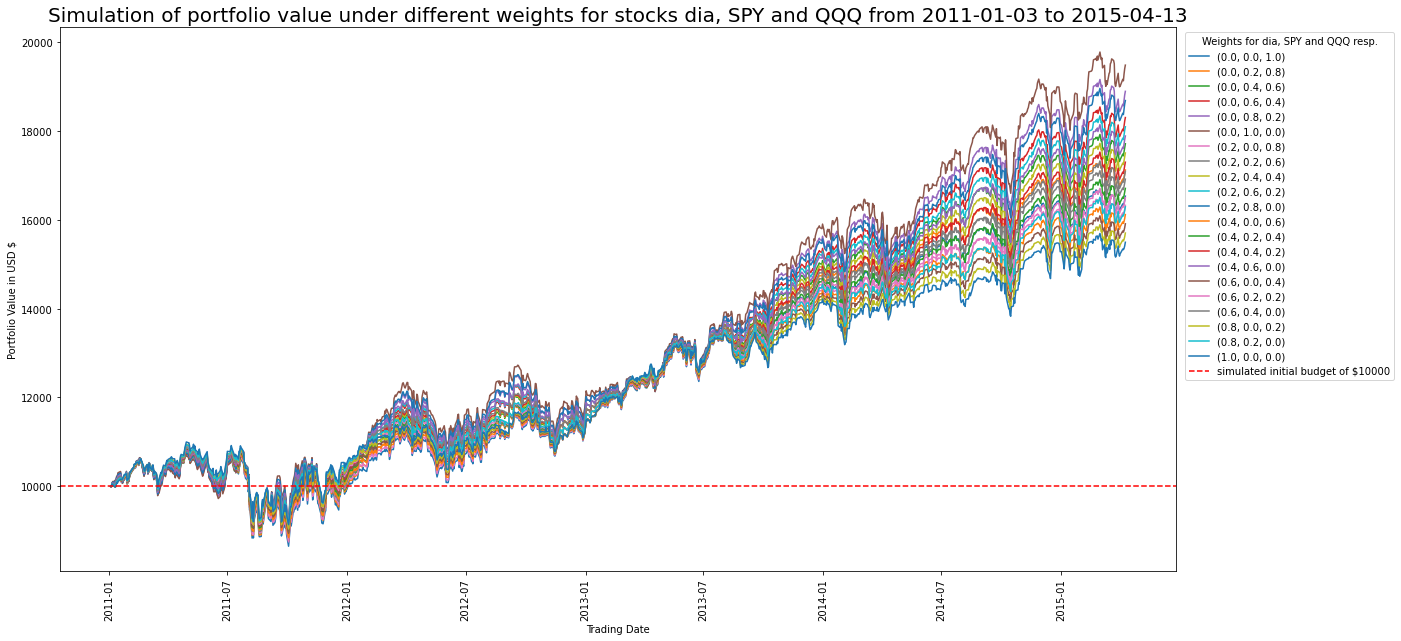

In [48]:
plt.figure(figsize=(20,10))

simulated_portfolio_values = []
for i in range(0,len(combinations)): 
    simulated_portfolio_values.append((combinations[i], simulate_portfolio_value(merged_df, combinations[i])['portfolio_value']))
simulated_portfolio_values

for i in range(0,len(simulated_portfolio_values)): 
    plt.plot(pd.to_datetime(simulated_portfolio_values[i][1].index), simulated_portfolio_values[i][1].values, label=str(simulated_portfolio_values[i][0]))
    
    
plt.axhline(y=10000, color='r',  ls='--', label=f'simulated initial budget of ${initial_budget}')

plt.legend(loc='upper right', title='Weights for dia, SPY and QQQ resp.', bbox_to_anchor=(1.2, 1.0))
plt.xticks(rotation=90)
plt.title(f"Simulation of portfolio value under different weights for stocks dia, SPY and QQQ from {start_dt} to {end_dt}", fontsize=20)
plt.xlabel("Trading Date")
plt.ylabel("Portfolio Value in USD $")



In [70]:
returns.iloc[0:10].values

array([ 0.00197574,  0.00342937, -0.00222148, -0.00179825, -0.00317408,
        0.0030121 ,  0.00729299, -0.00170362,  0.00418093,  0.00458833])

In [95]:
import numpy as np

def get_sharpe_ratio(returns, risk_free_rate=0.02):
    num_periods_per_year = 252  # Assuming 252 trading days in a year
    risk_free_rate_daily = np.power(1 + risk_free_rate, 1 / num_periods_per_year) - 1
    
    returns = np.asarray(returns)
    excess_returns = returns - risk_free_rate_daily
    return excess_returns.mean() / excess_returns.std()


import numpy as np

def get_sortino_ratio(returns, risk_free_rate=0.02, target_rate=0.0):
    num_periods_per_year = 252  # Assuming 252 trading days in a year
    risk_free_rate_daily = np.power(1 + risk_free_rate, 1 / num_periods_per_year) - 1
    
    returns = np.asarray(returns)
    excess_returns = returns - risk_free_rate_daily
    downside_returns = np.where(excess_returns < target_rate, excess_returns**2, 0)
    downside_deviation = np.sqrt(downside_returns.mean())
    return excess_returns.mean() / downside_deviation


In [96]:
i = 0
simulated_portfolio_values_df_list = []

simulated_portfolio_values[i]

for i in range(0,len(simulated_portfolio_values)): 
    
    price_data =simulated_portfolio_values[i][1]
    returns = (price_data / price_data.shift(1)) - 1
    returns = returns.iloc[1:]
    VaR = rt.historical_var(returns, confidence_level=0.95)
    cVaR = rt.historical_cvar(returns, confidence_level=0.95)
    sharpe_ratio = get_sharpe_ratio(returns, risk_free_rate=0.02)
    sortino_ratio = get_sortino_ratio(returns, risk_free_rate=0.02)
    
    simulated_portfolio_values_df_list.append(pd.DataFrame({'portfolio_config':[str(simulated_portfolio_values[i][0])], \
                                                            'mean':[np.mean(simulated_portfolio_values[i][1])], \
                                                            'var':[np.var(simulated_portfolio_values[i][1])], \
                                                            'std':[np.std(simulated_portfolio_values[i][1])],\
                                                            'VaR':[VaR], 'cVaR':[cVaR], 'sharpe_ratio':[sharpe_ratio],\
                                                            'sortino_ratio':[sortino_ratio]
                                                           }))
    
simulated_portfolio_values_df = pd.concat(simulated_portfolio_values_df_list)
simulated_portfolio_values_df['net_return'] = (simulated_portfolio_values_df['mean']-initial_budget)/initial_budget
simulated_portfolio_values_df

portfolio_config          mean           var          std       VaR  \
0  (0.0, 0.0, 1.0)  12510.288688  5.083605e+06  2254.685049  0.015869   
0  (0.0, 0.2, 0.8)  12705.269114  5.719891e+06  2391.629397  0.016051   
0  (0.0, 0.4, 0.6)  12900.249540  6.411396e+06  2532.073517  0.016458   
0  (0.0, 0.6, 0.4)  13095.229966  7.158120e+06  2675.466321  0.016406   
0  (0.0, 0.8, 0.2)  13290.210392  7.960062e+06  2821.358254  0.016279   
0  (0.0, 1.0, 0.0)  13485.190818  8.817223e+06  2969.380975  0.016835   
0  (0.2, 0.0, 0.8)  12480.515708  4.660086e+06  2158.723244  0.015150   
0  (0.2, 0.2, 0.6)  12675.496134  5.268074e+06  2295.228434  0.015758   
0  (0.2, 0.4, 0.4)  12870.476560  5.931280e+06  2435.421873  0.015939   
0  (0.2, 0.6, 0.2)  13065.456986  6.649704e+06  2578.702088  0.016040   
0  (0.2, 0.8, 0.0)  13260.437412  7.423348e+06  2724.582139  0.016311   
0  (0.4, 0.0, 0.6)  12450.742728  4.257335e+06  2063.331101  0.014985   
0  (0.4, 0.2, 0.4)  12645.723154  4.837024e+06  2199.323479  0.015330   
0  (0.4, 0.4, 0.2)  12840.703580  5.471931e+06  2339.215877  0.015576   
0  (0.4, 0.6, 0.0)  13035.684005  6.162057e+06  2482.349026  0.015692   
0  (0.6, 0.0, 0.4)  12420.969748  3.875352e+06  1968.591434  0.014927   
0  (0.6, 0.2, 0.2)  12615.950173  4.426742e+06  2103.982363  0.015050   
0  (0.6, 0.4, 0.0)  12810.930599  5.033350e+06  2243.512859  0.015202   
0  (0.8, 0.0, 0.2)  12391.196767  3.514137e+06  1874.603171  0.014924   
0  (0.8, 0.2, 0.0)  12586.177193  4.037228e+06  2009.285348  0.014880   
0  (1.0, 0.0, 0.0)  12361.423787  3.173690e+06  1781.485244  0.014498   

       cVaR  sharpe_ratio  sortino_ratio  net_return  
0  0.023026      0.045477       0.063596    0.251029  
0  0.023082      0.048603       0.068151    0.270527  
0  0.023291      0.051290       0.072146    0.290025  
0  0.023601      0.053544       0.075560    0.309523  
0  0.023996      0.055395       0.078405    0.329021  
0  0.024466      0.056887       0.080726    0.348519  
0  0.022576      0.044951       0.062823    0.248052  
0  0.022640      0.048222       0.067562    0.267550  
0  0.022849      0.051036       0.071725    0.287048  
0  0.023151      0.053397       0.075290    0.306546  
0  0.023528      0.055334       0.078260    0.326044  
0  0.022183      0.044311       0.061910    0.245074  
0  0.022221      0.047732       0.066833    0.264572  
0  0.022420      0.050679       0.071169    0.284070  
0  0.022726      0.053155       0.074892    0.303568  
0  0.021836      0.043550       0.060847    0.242097  
0  0.021875      0.047123       0.065956    0.261595  
0  0.022033      0.050210       0.070468    0.281093  
0  0.021536      0.042663       0.059627    0.239120  
0  0.021551      0.046388       0.064924    0.258618  
0  0.021266      0.041645       0.058247    0.236142

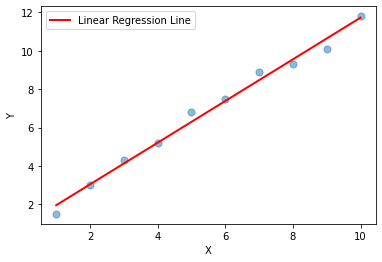

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def linear_regression_best_fit(points, values):
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(points, values)

    # Generate the line of best fit
    x_values = np.linspace(points.min(), points.max(), 100).reshape(-1, 1)
    y_values = model.predict(x_values)

    # Plot the original points
    plt.scatter(points, values, marker='o', s=50, alpha=0.5)

    # Plot the line of best fit
    plt.plot(x_values, y_values, linewidth=2, color='red', label='Linear Regression Line')

    # Axis labels
    plt.xlabel('X')
    plt.ylabel('Y')

    # Legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
points = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
values = np.array([1.5, 3, 4.3, 5.2, 6.8, 7.5, 8.9, 9.3, 10.1, 11.8])

linear_regression_best_fit(points, values)


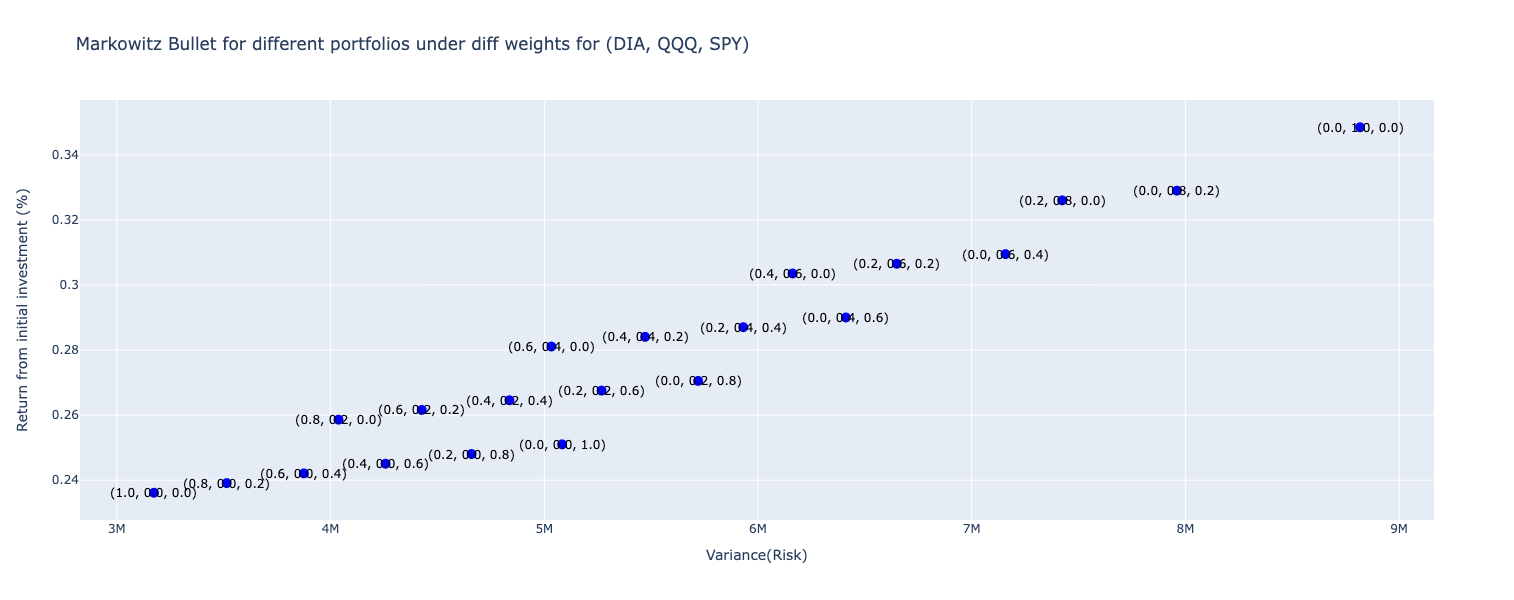

In [89]:
plot.plot_markowitz_bullet(list(simulated_portfolio_values_df['var']), list(simulated_portfolio_values_df['net_return']), \
                           text_vals =list(simulated_portfolio_values_df['portfolio_config']), \
                           title='Markowitz Bullet for different portfolios under diff weights for (DIA, QQQ, SPY)',\
                           xaxis_title='Variance(Risk)', yaxis_title='Return from initial investment (%)', height=600, width=800)



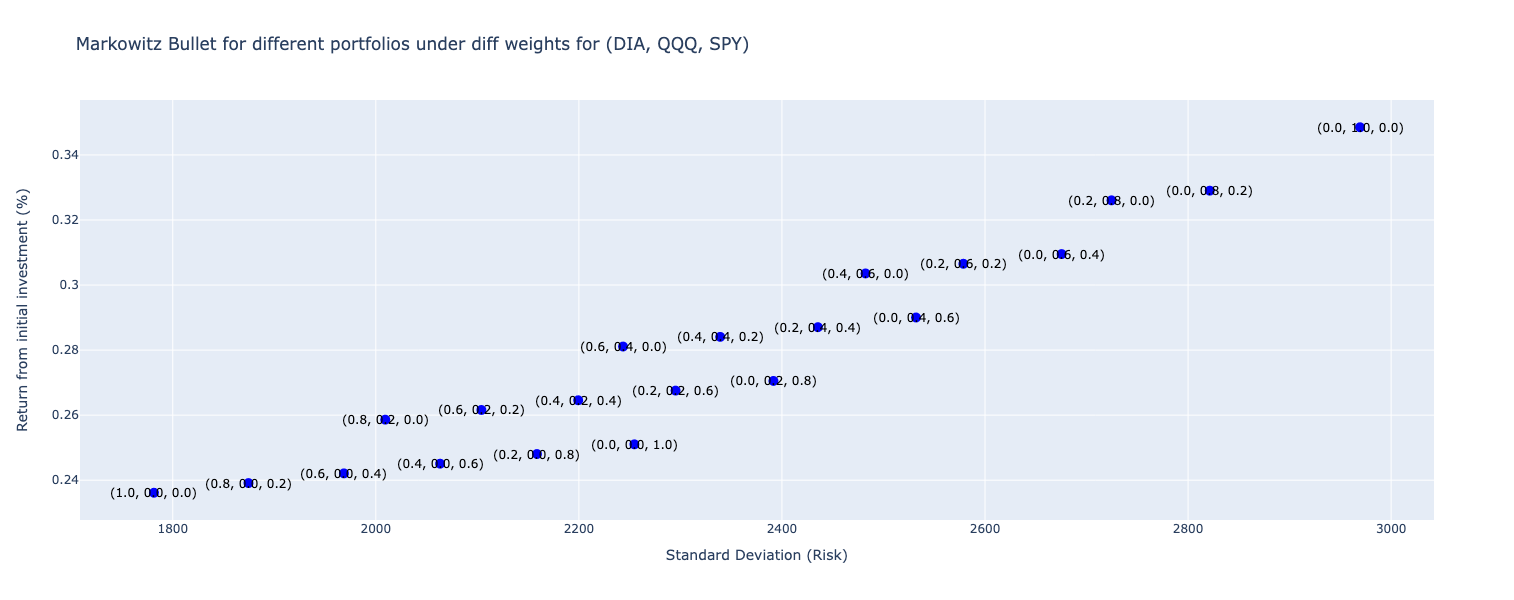

In [52]:
plot.plot_markowitz_bullet(list(simulated_portfolio_values_df['std']), list(simulated_portfolio_values_df['net_return']), \
                           text_vals =list(simulated_portfolio_values_df['portfolio_config']), \
                           title='Markowitz Bullet for different portfolios under diff weights for (DIA, QQQ, SPY)',\
                           xaxis_title='Standard Deviation (Risk)', yaxis_title='Return from initial investment (%)', height=600, width=800)

In [125]:

temp_df = simulated_portfolio_values_df[['portfolio_config', 'VaR']].copy(deep=True)
temp_df.reset_index(drop=True, inplace=True)
styled_df = temp_df.style.background_gradient(cmap='Blues')
styled_df

In [84]:
simulated_portfolio_values_df['VaR ($)'] = simulated_portfolio_values_df[['VaR']]*initial_budget
simulated_portfolio_values_df['cVaR ($)'] = simulated_portfolio_values_df[['cVaR']]*initial_budget

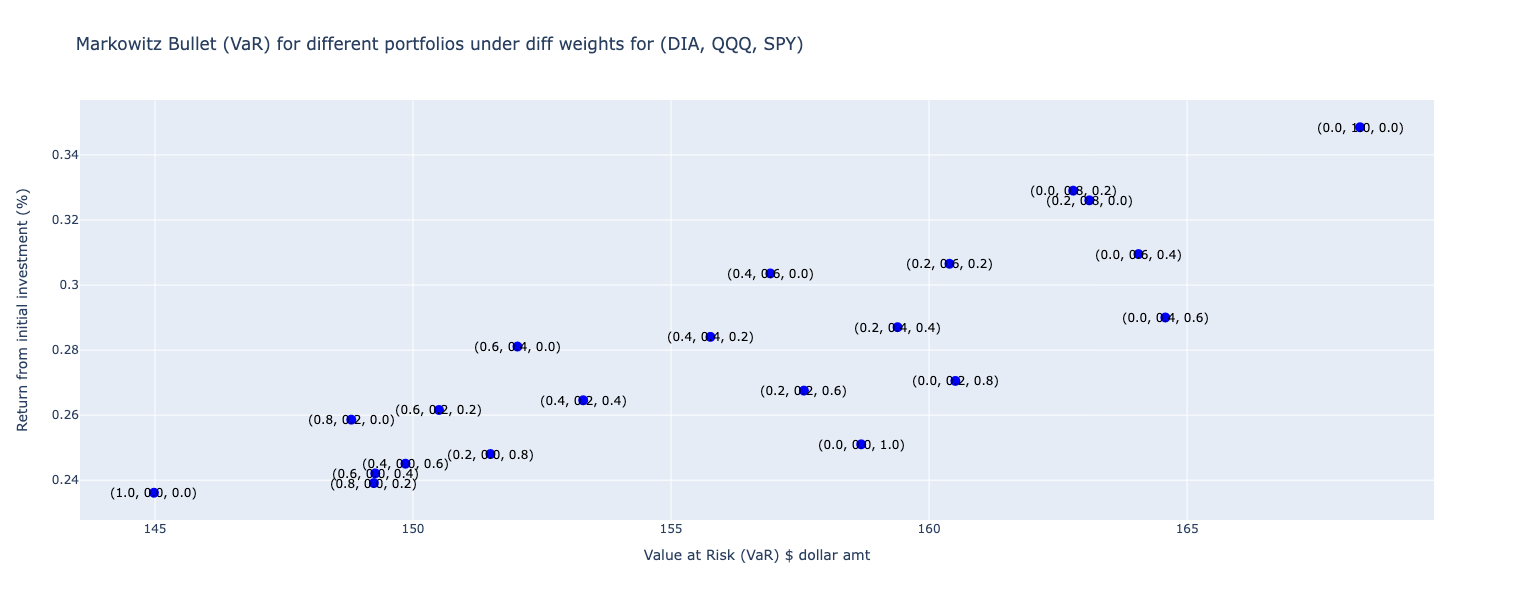

In [83]:
plot.plot_markowitz_bullet(list(simulated_portfolio_values_df['VaR ($)']), list(simulated_portfolio_values_df['net_return']), \
                           text_vals =list(simulated_portfolio_values_df['portfolio_config']), \
                           title='Markowitz Bullet (VaR) for different portfolios under diff weights for (DIA, QQQ, SPY)',\
                           xaxis_title=r'Value at Risk (VaR) $ dollar amt', yaxis_title='Return from initial investment (%)', height=600, width=800)

In [132]:
tickers

['DIA', 'QQQ', 'SPY']

In [126]:



temp_df = simulated_portfolio_values_df[['portfolio_config', 'cVaR']].copy(deep=True)
temp_df.reset_index(drop=True, inplace=True)
styled_df = temp_df.style.background_gradient(cmap='Blues')
styled_df

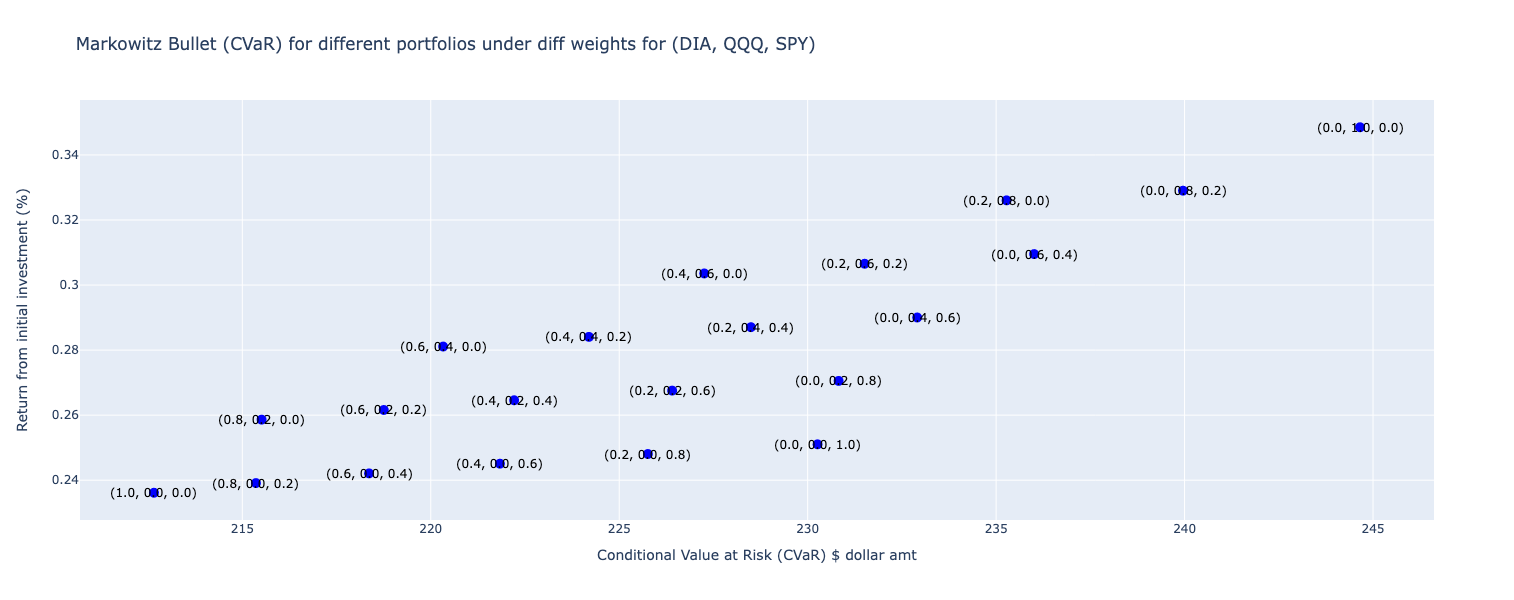

In [86]:
plot.plot_markowitz_bullet(list(simulated_portfolio_values_df['cVaR ($)']), list(simulated_portfolio_values_df['net_return']), \
                           text_vals =list(simulated_portfolio_values_df['portfolio_config']), \
                           title='Markowitz Bullet (CVaR) for different portfolios under diff weights for (DIA, QQQ, SPY)',\
                           xaxis_title=r'Conditional Value at Risk (CVaR) $ dollar amt', yaxis_title='Return from initial investment (%)', height=600, width=800)

### Sharpe Ratios

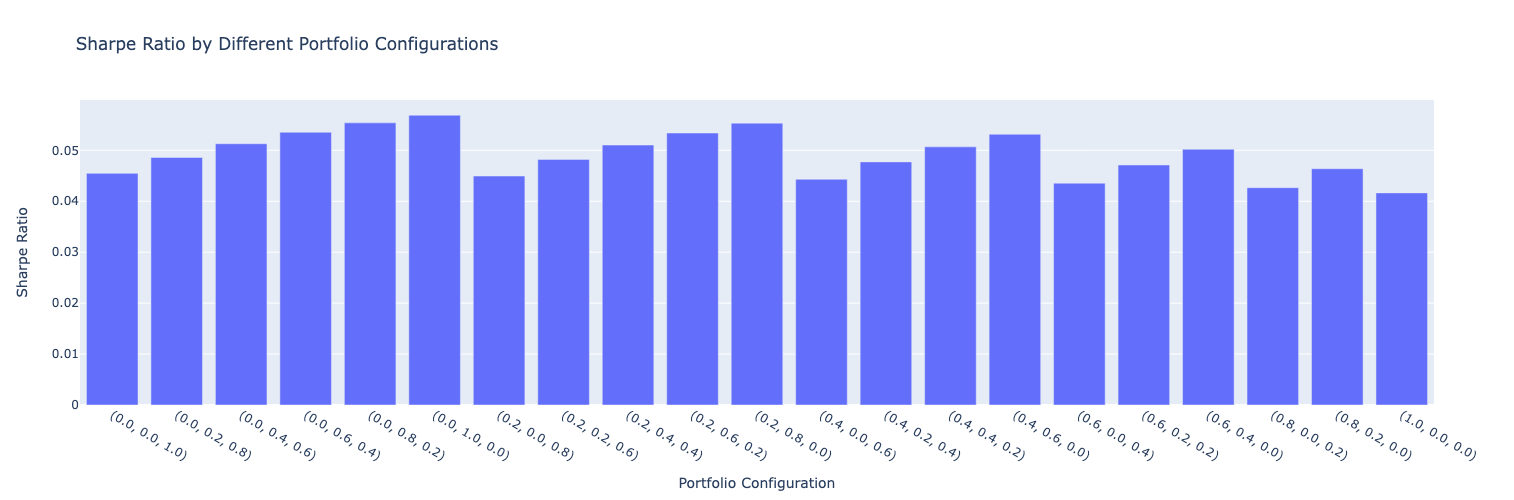

In [114]:

import plotly.graph_objs as go
import plotly.offline as pyo

def create_barplot(x, y, title='', x_title='', y_title='', width=800, height=500):
    data = [go.Bar(x=x, y=y)]
    layout = go.Layout(
        title=title,
        xaxis=dict(title=x_title),
        yaxis=dict(title=y_title),
        width=width,
        height=height
    )
    fig = go.Figure(data=data, layout=layout)
    pyo.iplot(fig)

    
import plotly.express as px

def create_scatterplot(x_values, y_values, marker_sizes, width=600, height=400, title=None, xaxis_title=None, yaxis_title=None):
    # Create a dataframe from the x and y values
    data = {'x': x_values, 'y': y_values, 'marker_size': marker_sizes}
    df = pd.DataFrame(data)
    
    # Create the scatter plot
    fig = px.scatter(df, x='x', y='y', size='marker_size')
    
    # Set optional parameters
    fig.update_layout(
        width=width,
        height=height,
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title
    )
    
    return fig.show()

create_barplot(simulated_portfolio_values_df['portfolio_config'], simulated_portfolio_values_df['sharpe_ratio'], \
               title='Sharpe Ratio by Different Portfolio Configurations', x_title='Portfolio Configuration', y_title='Sharpe Ratio')

In [127]:
temp_df = simulated_portfolio_values_df[['portfolio_config', 'sharpe_ratio']].copy(deep=True)
temp_df.reset_index(drop=True, inplace=True)
styled_df = temp_df.style.background_gradient(cmap='Blues')
styled_df

In [131]:
temp_df = simulated_portfolio_values_df[['portfolio_config', 'sharpe_ratio']].copy(deep=True)
temp_df.reset_index(drop=True, inplace=True)
temp_df.sort_values(by='sharpe_ratio', ascending=False, inplace=True)
styled_df = temp_df.style.background_gradient(cmap='Blues')
styled_df

In [128]:


temp_df = simulated_portfolio_values_df[['portfolio_config', 'sortino_ratio']].copy(deep=True)
temp_df.reset_index(drop=True, inplace=True)
styled_df = temp_df.style.background_gradient(cmap='Blues')
styled_df

In [136]:
temp_df = simulated_portfolio_values_df[['portfolio_config', 'sortino_ratio']].copy(deep=True)
temp_df.reset_index(drop=True, inplace=True)
temp_df.sort_values(by='sortino_ratio', ascending=False, inplace=True)
styled_df = temp_df.style.background_gradient(cmap='Blues')
styled_df

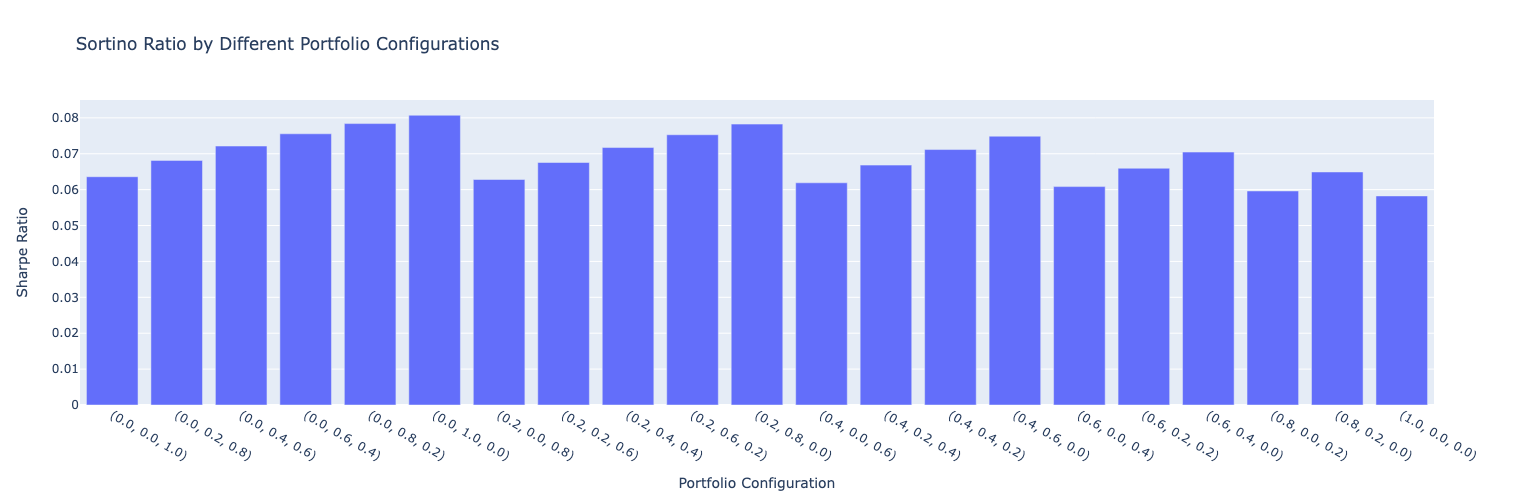

In [115]:


create_barplot(simulated_portfolio_values_df['portfolio_config'], simulated_portfolio_values_df['sortino_ratio'], \
               title='Sortino Ratio by Different Portfolio Configurations', x_title='Portfolio Configuration', y_title='Sharpe Ratio')

In [103]:
import plotly.graph_objects as go

def create_scatterplot(x_values, y_values, marker_sizes, width=600, height=400, title=None, xaxis_title=None, yaxis_title=None, annotations=None):
    # Create a trace for the scatter plot
    trace = go.Scatter(
        x=x_values,
        y=y_values,
        mode='markers',
        marker=dict(
            size=marker_sizes
        ),
        text=annotations,
        hovertemplate='x: %{x}<br>y: %{y}<br>size: %{marker.size}<extra>%{text}</extra>'
    )
    
    # Create the layout for the plot
    layout = go.Layout(
        width=width,
        height=height,
        title=title,
        xaxis=dict(title=xaxis_title),
        yaxis=dict(title=yaxis_title),
        hovermode='closest'
    )
    
    # Create the figure and add the trace and layout
    fig = go.Figure(data=[trace], layout=layout)
    
    return fig.show()


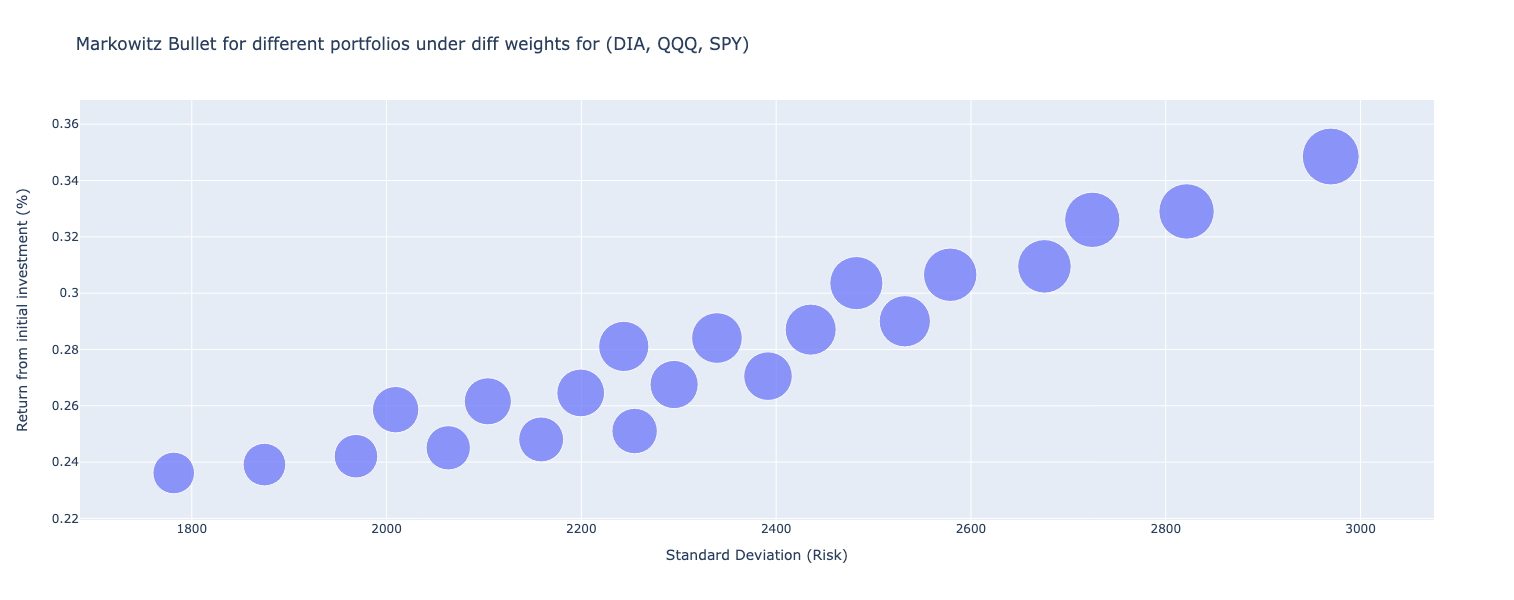

In [108]:
(simulated_portfolio_values_df['portfolio_config'], simulated_portfolio_values_df['sharpe_ratio'])

create_scatterplot(list(simulated_portfolio_values_df['std']), list(simulated_portfolio_values_df['net_return']), \
                   simulated_portfolio_values_df['sharpe_ratio']*1000,
                           annotations =list(simulated_portfolio_values_df['portfolio_config']), \
                           title='Markowitz Bullet for different portfolios under diff weights for (DIA, QQQ, SPY)',\
                           xaxis_title='Standard Deviation (Risk)', yaxis_title='Return from initial investment (%)', height=600, width=800)

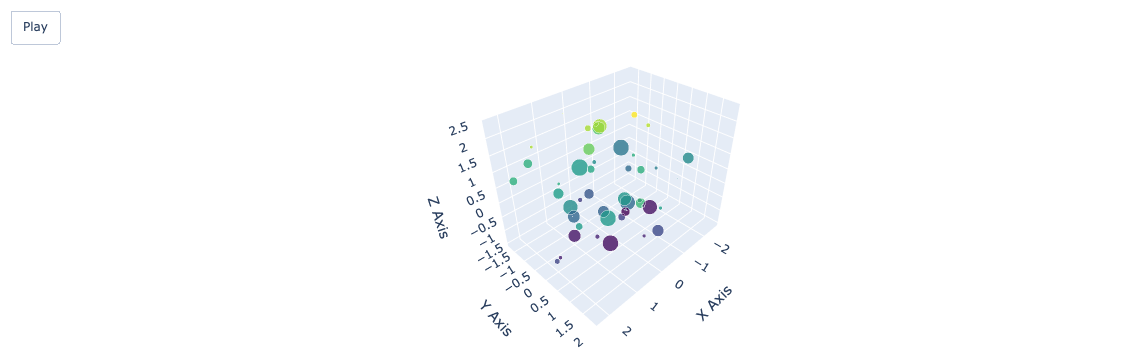

In [112]:
import plotly.graph_objs as go
import plotly.express as px
import numpy as np

# Create random data
np.random.seed(0)
x = np.random.randn(50)
y = np.random.randn(50)
z = np.random.randn(50)

# Define the size of each dot
size = np.random.rand(50) * 20

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=size,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
    scene_camera=dict(
        eye=dict(x=1.5, y=1.5, z=1.5)
    ),
    uirevision='constant'
)

# Add rotating animation
animation_settings = {
    "frame": {"duration": 200, "redraw": True},
    "fromcurrent": True,
    "transition": {"duration": 0}
}

fig.update_layout(updatemenus=[dict(type="buttons", showactive=False, buttons=[dict(label="Play",
                                            method="animate", args=[None, animation_settings])])])

frames = []

for t in np.arange(0, 1.1, 0.1):
    frames.append(go.Frame(layout=dict(scene=dict(camera=dict(eye=dict(x=1.5 * np.cos(2 * np.pi * t), y=1.5 * np.sin(2 * np.pi * t), z=1.5))))))

fig.frames = frames

# Show the plot
fig.show()


### Sortino Ratios

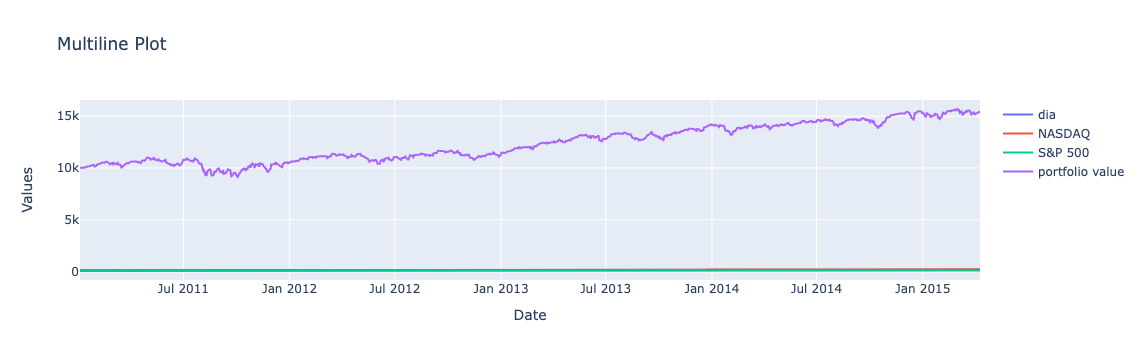

In [97]:
# import pandas as pd
# import plotly.graph_objects as go

# def multiline_plot(df, columns, labels=None):
#     """
#     Creates a multiline plot using Plotly.

#     Args:
#     df (pd.DataFrame): The input DataFrame.
#     columns (list): A list of column names to plot.
#     labels (list, optional): A list of labels corresponding to the columns. Default is None, in which case column names are used.

#     Returns:
#     plotly.graph_objects.Figure: The multiline plot figure.
#     """

#     if labels is None:
#         labels = columns

#     assert len(columns) == len(labels), "The number of columns and labels must be equal."

#     fig = go.Figure()

#     for col, label in zip(columns, labels):
#         fig.add_trace(go.Scatter(x=df.index, y=df[col], name=label, mode='lines'))

#     fig.update_layout(title='Multiline Plot', xaxis_title='Date', yaxis_title='Values')

#     return fig

# Example usage
columns_to_plot = ['Close_DIA', 'Close_SPY', 'Close_QQQ', 'portfolio_value']
labels = ['dia',  'NASDAQ', 'S&P 500','portfolio value']

fig = plot.multiline_plot(merged_df, columns_to_plot, labels)
fig.show()


### Forecasting Using Facebook Prophet

In [56]:
!pip install prophet

Looking in indexes: https://artifacts-prod-use1.pinadmin.com/artifactory/api/pypi/pinterest-python-pip-prod-virtual/simple/


In [57]:
dia_df.ticker_data

Open        High         Low       Close   Volume ticker  \
2011-01-03  116.410004  116.860001  116.360001  116.410004  9108900    DIA   
2011-01-04  116.709999  116.730003  116.110001  116.639999  9775600    DIA   
2011-01-05  116.459999  117.190002  116.300003  117.040001  7567800    DIA   
2011-01-06  117.139999  117.190002  116.500000  116.779999  7161600    DIA   
2011-01-07  116.910004  117.099998  115.820000  116.570000  9249800    DIA   
...                ...         ...         ...         ...      ...    ...   
2015-04-06  176.320007  179.169998  176.089996  178.589996  6284900    DIA   
2015-04-07  178.770004  179.580002  178.419998  178.419998  6011600    DIA   
2015-04-08  178.600006  179.559998  177.960007  178.750000  4738500    DIA   
2015-04-09  178.660004  179.630005  177.979996  179.399994  4483800    DIA   
2015-04-10  179.669998  180.440002  179.179993  180.369995  3463600    DIA   

            pct_change  Cumulative_Percentage_Change  normalized_close  \
2011-01-03         NaN                      0.000000          0.131682   
2011-01-04    0.001976                      0.197574          0.134696   
2011-01-05    0.003429                      0.541188          0.139937   
2011-01-06   -0.002221                      0.317838          0.136530   
2011-01-07   -0.001798                      0.137442          0.133779   
...                ...                           ...               ...   
2015-04-06    0.007105                     53.414647          0.946410   
2015-04-07   -0.000952                     53.268613          0.944182   
2015-04-08    0.001850                     53.552096          0.948506   
2015-04-09    0.003636                     54.110462          0.957023   
2015-04-10    0.005407                     54.943724          0.969733   

            cumulative_mean_normalized_close  \
2011-01-03                          0.131682   
2011-01-04                          0.133189   
2011-01-05                          0.135439   
2011-01-06                          0.135711   
2011-01-07                          0.135325   
...                                      ...   
2015-04-06                          0.490137   
2015-04-07                          0.490561   
2015-04-08                          0.490988   
2015-04-09                          0.491422   
2015-04-10                          0.491868   

            cumulative_variance_normalized_close  \
2011-01-03                              0.000000   
2011-01-04                              0.000002   
2011-01-05                              0.000012   
2011-01-06                              0.000009   
2011-01-07                              0.000008   
...                                          ...   
2015-04-06                              0.073307   
2015-04-07                              0.073431   
2015-04-08                              0.073558   
2015-04-09                              0.073692   
2015-04-10                              0.073836   

            cumulative_std_normalized_close      skew  kurtosis  \
2011-01-03                         0.000000 -0.426358  4.152463   
2011-01-04                         0.001507 -0.426358  4.152463   
2011-01-05                         0.003411 -0.426358  4.152463   
2011-01-06                         0.002991 -0.426358  4.152463   
2011-01-07                         0.002785 -0.426358  4.152463   
...                                     ...       ...       ...   
2015-04-06                         0.270753 -0.426358  4.152463   
2015-04-07                         0.270982 -0.426358  4.152463   
2015-04-08                         0.271216 -0.426358  4.152463   
2015-04-09                         0.271462 -0.426358  4.152463   
2015-04-10                         0.271728 -0.426358  4.152463   

            Jarque_Bera_stat  Jarque_Bera_p_val  
2011-01-03        804.160704      2.391784e-175  
2011-01-04        804.160704      2.391784e-175  
2011-01-05        804.160704      2

16:40:49 - cmdstanpy - INFO - Chain [1] start processing
16:40:50 - cmdstanpy - INFO - Chain [1] done processing


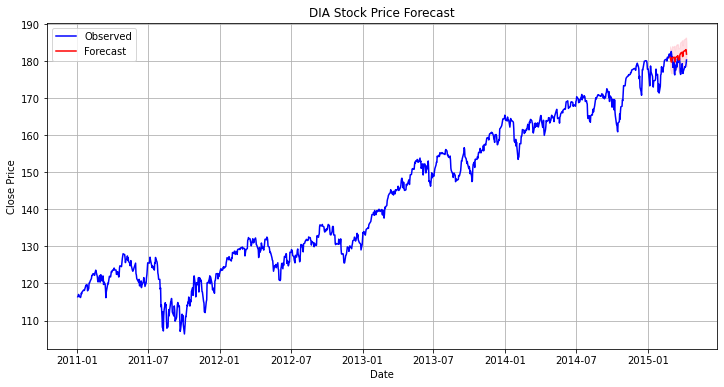

In [58]:
ph.plot_prediction(dia_df, ticker='DIA', test_period=30)

16:40:50 - cmdstanpy - INFO - Chain [1] start processing
16:40:51 - cmdstanpy - INFO - Chain [1] done processing


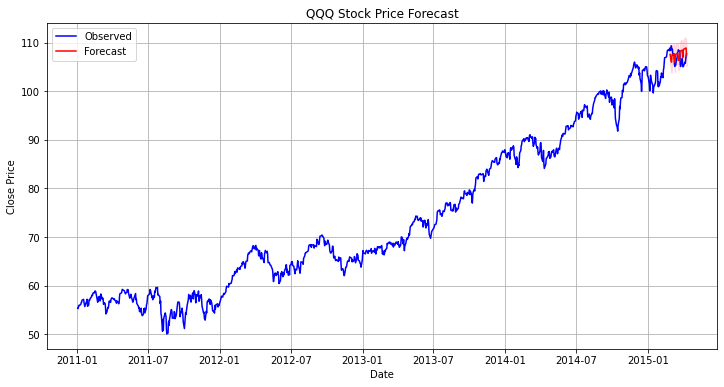

In [59]:
ph.plot_prediction(qqq_df, ticker='QQQ', test_period=30)

16:40:51 - cmdstanpy - INFO - Chain [1] start processing
16:40:51 - cmdstanpy - INFO - Chain [1] done processing


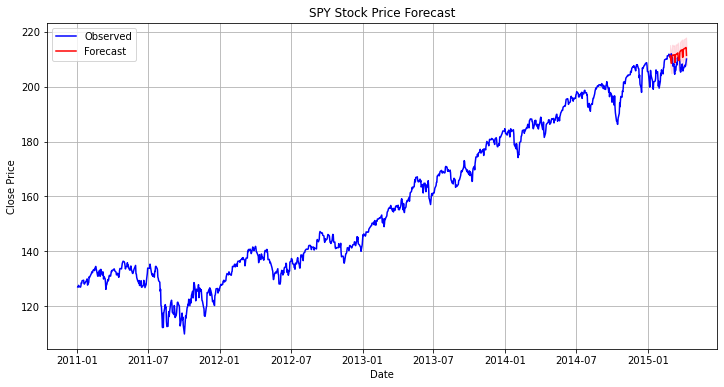

In [60]:
ph.plot_prediction(spy_df, ticker='SPY', test_period=30)

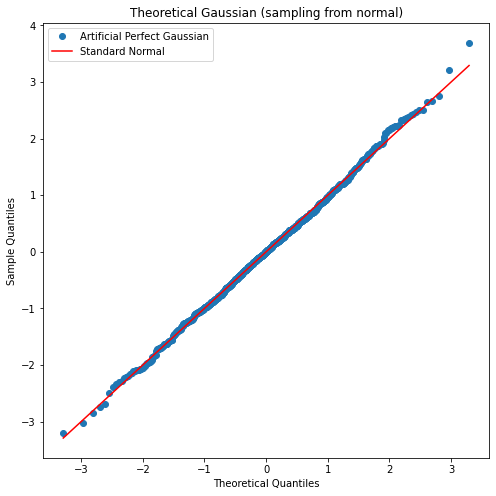

<Figure size 432x288 with 0 Axes>

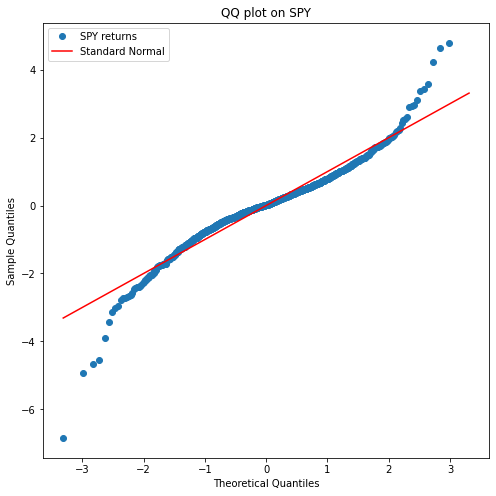

<Figure size 432x288 with 0 Axes>

In [61]:

# Example usage:
data = np.random.normal(0, 1, 1000)  # Generate a sample normal distribution
dt.generate_qq_plot_normal(data, title='Theoretical Gaussian (sampling from normal)', label='Artificial Perfect Gaussian')

dt.generate_qq_plot_normal(spy_df.ticker_data['pct_change'], title='QQ plot on SPY', label='SPY returns')

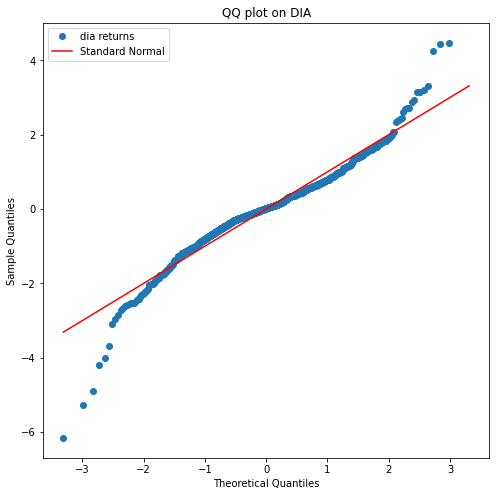

<Figure size 432x288 with 0 Axes>

In [62]:
dt.generate_qq_plot_normal(dia_df.ticker_data['pct_change'], title='QQ plot on DIA', label='dia returns')

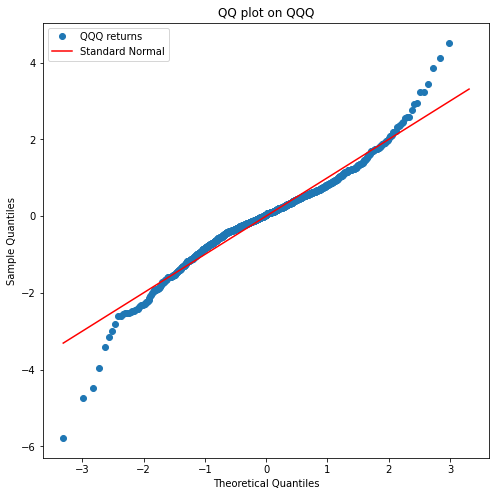

<Figure size 432x288 with 0 Axes>

In [63]:
dt.generate_qq_plot_normal(qqq_df.ticker_data['pct_change'], title='QQ plot on QQQ', label='QQQ returns')